# Prepare data

## Steps taken

- Data cleaning:
    - Dropping unnecessary columns (2 versions for 2 df versions);
    - Constraints checking (not done);
    - Consider Columns That Have Very Few Values less than 1%;
- Data correlation with depression (not done):
- Transformations and splitting:
    - Train Test Split;
    - Encoding categorical variables;
    - Scaling numerical data;
    - Merge two transformations;
- Other analysis:
    - Check columns that have low variance;

In [138]:
import pandas as pd

# df = pd.read_csv("../datasets/dataset(07052022)-(1.00).csv")

df = pd.read_csv("../datasets/dataset(08052022)-(1.02).csv")
df.head()

# Last update (08.05.2022)

,SEQN,depression,gender,age,race,citizenship,education_level,marital_status,household_size,pregnant,birth_place,veteran,household_income,asthma,asthma_onset,asthma_currently,asthma_emergency,anemia,ever_overweight,blood_transfusion,arthritis,heart_failure,heart_disease,angina,heart_attack,stroke,emphysema,bronchitis,liver_condition,thyroid_problem,bronchitis_currently,liver_condition_currently,thyroid_problem_currently,cancer,first_cancer_type,second_cancer_type,third_cancer_type,fourth_cancer_count,heart_attack_relative,asthma_relative,diabetes_relative,hay_fever,arthritis_onset,heart_failure_onset,heart_disease_onset,angina_onset,heart_attack_onset,stroke_onset,emphysema_onset,bronchitis_onset,liver_condition_onset,thyroid_problem_onset,cancer_onset,arthritis_type,first_cancer_count,second_cancer_count,third_cancer_count,weight,height,BMI,pulse,irregular_pulse,systolic,diastolic,albumin,ALT,AST,ALP,BUN,calcium,CO2,creatinine,GGT,glucose,iron,LHD,phosphorus,bilirubin,total_protein,uric_acid,sodium,potassium,chloride,osmolality,globulin,trouble_sleeping_history,sleep_hours,vigorous_recreation,moderate_recreation,sedentary_time,vigorous_work,moderate_work,drinks_per_occasion,lifetime_alcohol_consumption,drinks_past_year,cant_work,limited_work,walking_equipment,memory_problems,limitations,healthcare_equipment,health_problem_Other Impairment,health_problem_Bone or Joint,health_problem_Weight,health_problem_Back or Neck,health_problem_Arthritis,health_problem_Cancer,health_problem_Other Injury,health_problem_Breathing,health_problem_Stroke,health_problem_Blood Pressure,health_problem_Mental Retardation,health_problem_Hearing,health_problem_Heart,health_problem_Vision,health_problem_Diabetes,health_problem_Birth Defect,health_problem_Senility,health_problem_Other Developmental,marijuana_use,marijuana_per_month,cocaine_use,cocaine_number_uses,cocaine_per_month,heroine_use,heronine_per_month,meth_use,meth_number_uses,meth_per_month,inject_drugs,rehab_program,start_smoking_age,current_smoker,previous_cigarettes_per_day,current_cigarettes_per_day,days_quit_smoking,household_smokers
0,31131,Not Depressed,1,44,Black,Citizen,4,Married,4,No,USA,No,11,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,1.000,0.000,1.000,0.000,0.000,42.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Missing,0.000,0.000,0.000,75.200,156.000,30.900,58.000,0.000,144.000,74.000,3.500,14.000,16.000,74.000,6.000,8.900,23.000,0.800,17.000,87.000,51.000,105.000,3.400,0.400,6.900,4.900,137.000,4.100,106.000,271.000,3.400,0.000,9.000,No,No,150.000,0.000,0.000,0.000,Missing,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,4
1,31132,Not Depressed,0,70,White,Citizen,5,Married,2,Missing,USA,Yes,11,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,None,None,None,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,63.000,0.000,Missing,0.000,0.000,0.000,69.500,167.600,24.740,62.000,0.000,138.000,60.000,5.000,31.000,29.000,48.000,25.000,9.900,29.000,1.200,22.000,155.000,89.000,165.000,3.400,1.000,7.200,7.200,140.000,3.800,102.000,287.000,2.200,0.000,7.000,No,Yes,150.000,0.000,0.000,0.000,Missing,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,4
2,31134,Not Depressed,0,73,White,Citizen,3,Married,2,Missing,USA,Yes,5,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0

In [139]:
# Setting pandas to display max columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

# Setting pandas inf values to be nan
pd.set_option('mode.use_inf_as_na', True)

# Turning off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Data cleaning

### Dropping unnecessary columns

Info:
- There are 2 versions because we have 2 different untouched datasets:
    - dataset(07052022)-(1.00).csv
    - dataset(08052022)-(1.02).csv

#### For version 1.00

In [140]:
# # Drop RX columns
# rx = df.filter(regex=r"^Rx").columns
# df.drop(labels=rx, axis=1, inplace=True)

# # drop onset columns
# onset = df.filter(regex='onset').columns
# df.drop(labels=onset, axis=1, inplace=True)

# # drop particular columns
# df.drop(
#     labels=[
#         "SEQN", "citizenship", "pregnant",
#         "asthma_emergency", "hay_fever", "angina", "arthritis_type",
#         "systolic", "diastolic", "HDL", "triglyceride", "LDL",
#         "albumin", "ALT", "AST", "ALP", "BUN", "LHD", "uric_acid", 
#         "osmolality", "globulin", "white_BCC", "lymphocyte_percent",
#         "monocyte_percent", "neutrophils_percent", "eosinophils_percent",
#         "basophils_percent", "lymphocyte_count", "monocyte_count",
#         "neutrophils_count", "eosinophils_count", "basophils_count",
#         "RBC_count", "hemoglobin", "hematocrit", "MCV", "MCH", "MCHC",
#         "RDW", "platelet_count", "MPV", "full_time_work", "work_type",
#         "time_in_current_job", "out_of_work", "lifetime_alcohol_consumption",
#         "drinks_past_year"
#     ], 
#     axis=1,
#     inplace=True
# )

# # save dataset
# df.to_csv("../datasets/dataset(07052022)-(1.01).csv", index=False)

In [141]:
# df = pd.read_csv("../datasets/dataset(07052022)-(1.01).csv")
# df.head()

#### For version 1.02

In [142]:
# drop onset columns
onset = df.filter(regex='onset').columns
df.drop(labels=onset, axis=1, inplace=True)

# drop particular columns   
df.drop(
    labels=[
        "SEQN", "citizenship", "pregnant",
        "asthma_emergency", "hay_fever", "angina", "arthritis_type",
        "systolic", "diastolic",
        "albumin", "ALT", "AST", "ALP", "BUN", "LHD", "uric_acid",
        "osmolality", "globulin", 
        "lifetime_alcohol_consumption",
        "drinks_past_year"
    ],
    axis=1,
    inplace=True
)
# df.rename({"Unnamed":"a"}, axis="columns", inplace=True)
# df.drop(["a"], axis=1, inplace=True)
df.head()
# save dataset
df.to_csv("../datasets/dataset(08052022)-(1.03).csv", index=False)


In [143]:
df.columns

Index(['depression', 'gender', 'age', 'race', 'education_level',
       'marital_status', 'household_size', 'birth_place', 'veteran',
       'household_income',
       ...
       'meth_number_uses', 'meth_per_month', 'inject_drugs', 'rehab_program',
       'start_smoking_age', 'current_smoker', 'previous_cigarettes_per_day',
       'current_cigarettes_per_day', 'days_quit_smoking', 'household_smokers'],
      dtype='object', length=105)

### Constraints checking

In [144]:
smoking_constraint = df.loc[ df["start_smoking_age"] == 0 & df["current_cigarettes_per_day"]]
print(len(smoking_constraint))
print(28822 - 21426)

print("hi")

21426
7396
hi


### Consider Columns That Have Very Few Values less than 1%

In [145]:
# check unique values in terms of quantity and percent of all rows
for col in df.columns:
    num = len(df[col].unique())
    percentage = float(num) / df.shape[0] * 100
    if percentage < 1:
        print('%s, %d, %.1f%%' % (col, num, percentage))

depression, 2, 0.0%
gender, 2, 0.0%
age, 68, 0.2%
race, 5, 0.0%
education_level, 6, 0.0%
marital_status, 7, 0.0%
household_size, 7, 0.0%
birth_place, 6, 0.0%
veteran, 3, 0.0%
household_income, 13, 0.0%
asthma, 2, 0.0%
asthma_currently, 2, 0.0%
anemia, 2, 0.0%
ever_overweight, 2, 0.0%
blood_transfusion, 2, 0.0%
arthritis, 2, 0.0%
heart_failure, 2, 0.0%
heart_disease, 2, 0.0%
heart_attack, 2, 0.0%
stroke, 2, 0.0%
emphysema, 2, 0.0%
bronchitis, 2, 0.0%
liver_condition, 2, 0.0%
thyroid_problem, 2, 0.0%
bronchitis_currently, 2, 0.0%
liver_condition_currently, 2, 0.0%
thyroid_problem_currently, 2, 0.0%
cancer, 2, 0.0%
first_cancer_type, 31, 0.1%
second_cancer_type, 27, 0.1%
third_cancer_type, 18, 0.0%
fourth_cancer_count, 2, 0.0%
heart_attack_relative, 2, 0.0%
asthma_relative, 2, 0.0%
diabetes_relative, 2, 0.0%
first_cancer_count, 2, 0.0%
second_cancer_count, 2, 0.0%
third_cancer_count, 2, 0.0%
pulse, 58, 0.2%
irregular_pulse, 2, 0.0%
calcium, 54, 0.1%
CO2, 29, 0.1%
iron, 285, 0.8%
phosphoru

## Data correlation with depression

## Transformation and splitting dataset

### Train Test Split

In [146]:
from sklearn.model_selection import train_test_split

X = df.drop("depression", axis=1)
y = df["depression"].map({'Not Depressed': 0, 'Depressed': 1})

In [147]:
X.head()

,gender,age,race,education_level,marital_status,household_size,birth_place,veteran,household_income,asthma,asthma_currently,anemia,ever_overweight,blood_transfusion,arthritis,heart_failure,heart_disease,heart_attack,stroke,emphysema,bronchitis,liver_condition,thyroid_problem,bronchitis_currently,liver_condition_currently,thyroid_problem_currently,cancer,first_cancer_type,second_cancer_type,third_cancer_type,fourth_cancer_count,heart_attack_relative,asthma_relative,diabetes_relative,first_cancer_count,second_cancer_count,third_cancer_count,weight,height,BMI,pulse,irregular_pulse,calcium,CO2,creatinine,GGT,glucose,iron,phosphorus,bilirubin,total_protein,sodium,potassium,chloride,trouble_sleeping_history,sleep_hours,vigorous_recreation,moderate_recreation,sedentary_time,vigorous_work,moderate_work,drinks_per_occasion,cant_work,limited_work,walking_equipment,memory_problems,limitations,healthcare_equipment,health_problem_Other Impairment,health_problem_Bone or Joint,health_problem_Weight,health_problem_Back or Neck,health_problem_Arthritis,health_problem_Cancer,health_problem_Other Injury,health_problem_Breathing,health_problem_Stroke,health_problem_Blood Pressure,health_problem_Mental Retardation,health_problem_Hearing,health_problem_Heart,health_problem_Vision,health_problem_Diabetes,health_problem_Birth Defect,health_problem_Senility,health_problem_Other Developmental,marijuana_use,marijuana_per_month,cocaine_use,cocaine_number_uses,cocaine_per_month,heroine_use,heronine_per_month,meth_use,meth_number_uses,meth_per_month,inject_drugs,rehab_program,start_smoking_age,current_smoker,previous_cigarettes_per_day,current_cigarettes_per_day,days_quit_smoking,household_smokers
0,1,44,Black,4,Married,4,USA,No,11,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,1.000,0.000,1.000,0.000,0.000,0.000,75.200,156.000,30.900,58.000,0.000,8.900,23.000,0.800,17.000,87.000,51.000,3.400,0.400,6.900,137.000,4.100,106.000,0.000,9.000,No,No,150.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,4
1,0,70,White,5,Married,2,USA,Yes,11,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,None,None,None,0.000,0.000,0.000,0.000,0.000,0.000,0.000,69.500,167.600,24.740,62.000,0.000,9.900,29.000,1.200,22.000,155.000,89.000,3.400,1.000,7.200,140.000,3.800,102.000,0.000,7.000,No,Yes,150.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,4
2,0,73,White,3,Married,2,USA,Yes,5,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,0.000,0.000,0.000,0.000,0.000,0.000,101.900,182.400,30.630,50.000,0.000,9.500,27.000,1.200,33.000,93.000,84.000,3.300,0.500,7.100,139.000,4.100,103.000,1.000,7.000,No,Yes,90.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0,0,0,0,0,4
3,1,18,Other Hispanic,0,Never Married,3,USA,No,11,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,None,None,None,0.000,0.000,0.000,0.000,0.000,0.000,0.000,73.900,158.400,29.450,68.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.000,Yes,Yes,120.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.

In [148]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: depression, dtype: int64

In [149]:
# tran test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=.33, 
    random_state=123, 
    stratify=y
)

In [150]:
print("X_train shape:", X_train.shape,
      "y_train shape:", y_train.shape,
      "X_test shape:", X_test.shape,
      "y_test:", y_test.shape)

X_train shape: (24293, 104) y_train shape: (24293,) X_test shape: (11966, 104) y_test: (11966,)


### Encoding categorical variables

In [151]:
# Selecting the columns to be one hot encoded
cat_cols = X_train.select_dtypes('O').columns
cat_cols

Index(['race', 'marital_status', 'birth_place', 'veteran', 'first_cancer_type',
       'second_cancer_type', 'third_cancer_type', 'vigorous_recreation',
       'moderate_recreation'],
      dtype='object')

In [152]:
from sklearn.preprocessing import OneHotEncoder

# creating encoder
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

# One hot encoding the categorical columns of the dataframes
cat_train = encoder.fit_transform(X_train[cat_cols])
cat_test = encoder.transform(X_test[cat_cols])

# Getting the new names of the columns
col_names = encoder.get_feature_names_out(cat_cols)

# Turning the encoded columns into dataframes
cat_train_df = pd.DataFrame(cat_train, columns=col_names, index=X_train.index)
cat_test_df = pd.DataFrame(cat_test, columns=col_names, index=X_test.index)

# Checking the new dataframe
cat_train_df.head()

,race_Black,race_Mexican,race_Other Hispanic,race_Other and Multiracial,race_White,marital_status_Divorced,marital_status_Married,marital_status_Missing,marital_status_Never Married,marital_status_Partner,marital_status_Separated,marital_status_Widowed,birth_place_Elsewhere,birth_place_Mexico,birth_place_Missing,birth_place_Other Non Spanish Country,birth_place_Other Spanish Country,birth_place_USA,veteran_Missing,veteran_No,veteran_Yes,first_cancer_type_Bladder,first_cancer_type_Blood,first_cancer_type_Bone,first_cancer_type_Brain,first_cancer_type_Breast,first_cancer_type_Cervical,first_cancer_type_Colon,first_cancer_type_Esophageal,first_cancer_type_Gallbladder,first_cancer_type_Kidney,first_cancer_type_Larynx,first_cancer_type_Leukemia,first_cancer_type_Liver,first_cancer_type_Lung,first_cancer_type_Lymphoma,first_cancer_type_Melanoma,first_cancer_type_Mouth,first_cancer_type_Nervous System,first_cancer_type_None,first_cancer_type_Other,first_cancer_type_Ovarian,first_cancer_type_Pancreatic,first_cancer_type_Prostate,first_cancer_type_Rectal,first_cancer_type_Skin Non Melanoma,first_cancer_type_Skin Other,first_cancer_type_Soft Tissue,first_cancer_type_Stomach,first_cancer_type_Testicular,first_cancer_type_Thyroid,first_cancer_type_Uterine,second_cancer_type_Bladder,second_cancer_type_Blood,second_cancer_type_Bone,second_cancer_type_Brain,second_cancer_type_Breast,second_cancer_type_Cervical,second_cancer_type_Colon,second_cancer_type_Esophageal,second_cancer_type_Kidney,second_cancer_type_Larynx,second_cancer_type_Leukemia,second_cancer_type_Liver,second_cancer_type_Lung,second_cancer_type_Lymphoma,second_cancer_type_Melanoma,second_cancer_type_Mouth,second_cancer_type_None,second_cancer_type_Other,second_cancer_type_Ovarian,second_cancer_type_Pancreatic,second_cancer_type_Prostate,second_cancer_type_Rectal,second_cancer_type_Skin Non Melanoma,second_cancer_type_Skin Other,second_cancer_type_Stomach,second_cancer_type_Thyroid,second_cancer_type_Uterine,third_cancer_type_Blood,third_cancer_type_Bone,third_cancer_type_Breast,third_cancer_type_Cervical,third_cancer_type_Liver,third_cancer_type_Lung,third_cancer_type_Melanoma,third_cancer_type_None,third_cancer_type_Other,third_cancer_type_Ovarian,third_cancer_type_Prostate,third_cancer_type_Skin Non Melanoma,third_cancer_type_Skin Other,third_cancer_type_Thyroid,third_cancer_type_Uterine,vigorous_recreation_Missing,vigorous_recreation_No,vigorous_recreation_Yes,moderate_recreation_Missing,moderate_recreation_No,moderate_recreation_Yes
16988,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
34945,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
20102,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00

In [153]:
# Checking the new dataframe
cat_test_df.head()

,race_Black,race_Mexican,race_Other Hispanic,race_Other and Multiracial,race_White,marital_status_Divorced,marital_status_Married,marital_status_Missing,marital_status_Never Married,marital_status_Partner,marital_status_Separated,marital_status_Widowed,birth_place_Elsewhere,birth_place_Mexico,birth_place_Missing,birth_place_Other Non Spanish Country,birth_place_Other Spanish Country,birth_place_USA,veteran_Missing,veteran_No,veteran_Yes,first_cancer_type_Bladder,first_cancer_type_Blood,first_cancer_type_Bone,first_cancer_type_Brain,first_cancer_type_Breast,first_cancer_type_Cervical,first_cancer_type_Colon,first_cancer_type_Esophageal,first_cancer_type_Gallbladder,first_cancer_type_Kidney,first_cancer_type_Larynx,first_cancer_type_Leukemia,first_cancer_type_Liver,first_cancer_type_Lung,first_cancer_type_Lymphoma,first_cancer_type_Melanoma,first_cancer_type_Mouth,first_cancer_type_Nervous System,first_cancer_type_None,first_cancer_type_Other,first_cancer_type_Ovarian,first_cancer_type_Pancreatic,first_cancer_type_Prostate,first_cancer_type_Rectal,first_cancer_type_Skin Non Melanoma,first_cancer_type_Skin Other,first_cancer_type_Soft Tissue,first_cancer_type_Stomach,first_cancer_type_Testicular,first_cancer_type_Thyroid,first_cancer_type_Uterine,second_cancer_type_Bladder,second_cancer_type_Blood,second_cancer_type_Bone,second_cancer_type_Brain,second_cancer_type_Breast,second_cancer_type_Cervical,second_cancer_type_Colon,second_cancer_type_Esophageal,second_cancer_type_Kidney,second_cancer_type_Larynx,second_cancer_type_Leukemia,second_cancer_type_Liver,second_cancer_type_Lung,second_cancer_type_Lymphoma,second_cancer_type_Melanoma,second_cancer_type_Mouth,second_cancer_type_None,second_cancer_type_Other,second_cancer_type_Ovarian,second_cancer_type_Pancreatic,second_cancer_type_Prostate,second_cancer_type_Rectal,second_cancer_type_Skin Non Melanoma,second_cancer_type_Skin Other,second_cancer_type_Stomach,second_cancer_type_Thyroid,second_cancer_type_Uterine,third_cancer_type_Blood,third_cancer_type_Bone,third_cancer_type_Breast,third_cancer_type_Cervical,third_cancer_type_Liver,third_cancer_type_Lung,third_cancer_type_Melanoma,third_cancer_type_None,third_cancer_type_Other,third_cancer_type_Ovarian,third_cancer_type_Prostate,third_cancer_type_Skin Non Melanoma,third_cancer_type_Skin Other,third_cancer_type_Thyroid,third_cancer_type_Uterine,vigorous_recreation_Missing,vigorous_recreation_No,vigorous_recreation_Yes,moderate_recreation_Missing,moderate_recreation_No,moderate_recreation_Yes
28420,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
14332,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000
17035,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.00

### Scaling numerical data

In [154]:
# selecting columns to be scaled
scale_cols = X_train.select_dtypes('number').columns
scale_cols

Index(['gender', 'age', 'education_level', 'household_size',
       'household_income', 'asthma', 'asthma_currently', 'anemia',
       'ever_overweight', 'blood_transfusion', 'arthritis', 'heart_failure',
       'heart_disease', 'heart_attack', 'stroke', 'emphysema', 'bronchitis',
       'liver_condition', 'thyroid_problem', 'bronchitis_currently',
       'liver_condition_currently', 'thyroid_problem_currently', 'cancer',
       'fourth_cancer_count', 'heart_attack_relative', 'asthma_relative',
       'diabetes_relative', 'first_cancer_count', 'second_cancer_count',
       'third_cancer_count', 'weight', 'height', 'BMI', 'pulse',
       'irregular_pulse', 'calcium', 'CO2', 'creatinine', 'GGT', 'glucose',
       'iron', 'phosphorus', 'bilirubin', 'total_protein', 'sodium',
       'potassium', 'chloride', 'trouble_sleeping_history', 'sleep_hours',
       'sedentary_time', 'vigorous_work', 'moderate_work',
       'drinks_per_occasion', 'cant_work', 'limited_work', 'walking_equipment',
   

In [155]:
from sklearn.preprocessing import QuantileTransformer

# Creating transformer
transformer = QuantileTransformer(random_state=123)

# Fit and transform
trans_train = transformer.fit_transform(X_train[scale_cols])
trans_test = transformer.transform(X_test[scale_cols])

# Turning the scaled data into dataframes
trans_train_df = pd.DataFrame(trans_train, columns=X_train[scale_cols].columns,
                             index=X_train.index)
trans_test_df = pd.DataFrame(trans_test, columns=X_train[scale_cols].columns,
                             index=X_test.index)
                             
# Checking the new dataframe
trans_train_df.head()

,gender,age,education_level,household_size,household_income,asthma,asthma_currently,anemia,ever_overweight,blood_transfusion,arthritis,heart_failure,heart_disease,heart_attack,stroke,emphysema,bronchitis,liver_condition,thyroid_problem,bronchitis_currently,liver_condition_currently,thyroid_problem_currently,cancer,fourth_cancer_count,heart_attack_relative,asthma_relative,diabetes_relative,first_cancer_count,second_cancer_count,third_cancer_count,weight,height,BMI,pulse,irregular_pulse,calcium,CO2,creatinine,GGT,glucose,iron,phosphorus,bilirubin,total_protein,sodium,potassium,chloride,trouble_sleeping_history,sleep_hours,sedentary_time,vigorous_work,moderate_work,drinks_per_occasion,cant_work,limited_work,walking_equipment,memory_problems,limitations,healthcare_equipment,health_problem_Other Impairment,health_problem_Bone or Joint,health_problem_Weight,health_problem_Back or Neck,health_problem_Arthritis,health_problem_Cancer,health_problem_Other Injury,health_problem_Breathing,health_problem_Stroke,health_problem_Blood Pressure,health_problem_Mental Retardation,health_problem_Hearing,health_problem_Heart,health_problem_Vision,health_problem_Diabetes,health_problem_Birth Defect,health_problem_Senility,health_problem_Other Developmental,marijuana_use,marijuana_per_month,cocaine_use,cocaine_number_uses,cocaine_per_month,heroine_use,heronine_per_month,meth_use,meth_number_uses,meth_per_month,inject_drugs,rehab_program,start_smoking_age,current_smoker,previous_cigarettes_per_day,current_cigarettes_per_day,days_quit_smoking,household_smokers
16988,1.000,0.575,1.000,0.285,0.424,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.027,0.167,0.043,0.261,0.000,0.949,0.675,0.134,0.291,0.857,0.469,0.988,0.499,0.492,0.467,0.165,0.328,0.000,0.460,0.510,0.000,0.000,0.530,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
34945,1.000,0.000,0.000,0.832,0.424,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.749,0.000,0.127,0.147,0.078,0.056,0.090,0.121,0.115,0.136,0.064,0.639,0.237,0.442,1.000,0.987,0.975,0.000,0.000,0.979,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.463
20102,0.000,0.968,0.645,0.285,0.424,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.886,0.893,0.766,0.519,0.000,0.238,0.230,0.979,0.383,0.948,0.960,0.171,0.756,0.654,0.127,0.449,0.125,0.000,0.730,0.769,0.000,0.000,0.709,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.837,0.689,0.983,0.000,0.947,1.000
33319,1.000,0.851,0.221,0.000,0.216,1.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.970,0.283,0.988,0.700,0.000,0.172,0.907,0.691,0.383,0.862,0.562,0.258,0.226,0.162,0.789,0.982,0.328,1.000,0.231,0.769,0.000,1.000,0.709,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.906,0.689,0.883,0.000,0.821,0.364
9957,0.000,0.636,0.645,0.696,0.312,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0

In [156]:
trans_test_df.head()

,gender,age,education_level,household_size,household_income,asthma,asthma_currently,anemia,ever_overweight,blood_transfusion,arthritis,heart_failure,heart_disease,heart_attack,stroke,emphysema,bronchitis,liver_condition,thyroid_problem,bronchitis_currently,liver_condition_currently,thyroid_problem_currently,cancer,fourth_cancer_count,heart_attack_relative,asthma_relative,diabetes_relative,first_cancer_count,second_cancer_count,third_cancer_count,weight,height,BMI,pulse,irregular_pulse,calcium,CO2,creatinine,GGT,glucose,iron,phosphorus,bilirubin,total_protein,sodium,potassium,chloride,trouble_sleeping_history,sleep_hours,sedentary_time,vigorous_work,moderate_work,drinks_per_occasion,cant_work,limited_work,walking_equipment,memory_problems,limitations,healthcare_equipment,health_problem_Other Impairment,health_problem_Bone or Joint,health_problem_Weight,health_problem_Back or Neck,health_problem_Arthritis,health_problem_Cancer,health_problem_Other Injury,health_problem_Breathing,health_problem_Stroke,health_problem_Blood Pressure,health_problem_Mental Retardation,health_problem_Hearing,health_problem_Heart,health_problem_Vision,health_problem_Diabetes,health_problem_Birth Defect,health_problem_Senility,health_problem_Other Developmental,marijuana_use,marijuana_per_month,cocaine_use,cocaine_number_uses,cocaine_per_month,heroine_use,heronine_per_month,meth_use,meth_number_uses,meth_per_month,inject_drugs,rehab_program,start_smoking_age,current_smoker,previous_cigarettes_per_day,current_cigarettes_per_day,days_quit_smoking,household_smokers
28420,1.000,0.385,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.156,0.346,0.185,0.000,0.000,0.532,0.675,0.147,0.965,0.071,0.908,0.581,0.499,0.791,0.310,0.077,0.236,0.000,0.333,0.952,0.000,0.000,0.829,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
14332,0.000,0.968,0.109,0.000,0.312,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.242,0.650,0.155,0.585,0.000,0.734,0.511,0.897,0.162,0.080,0.606,0.764,0.756,0.332,0.127,0.933,0.097,0.000,0.730,0.769,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
17035,0.000,0.559,1.000,0.832,0.528,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.635,0.972,0.275,0.585,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.730,0.261,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
12753,1.000,0.559,0.109,0.525,0.424,1.000,1.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.190,0.270,0.271,0.154,0.000,0.172,0.813,0.304,0.955,0.951,0.964,0.888,0.893,0.890,0.639,0.071,0.708,0.000,0.091,0.020,0.000,1.000,0.974,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.960,0.000,1.000,0.999,0.000,0.000,0.000,1.000,1.000,0.837,1.000,0.000,0.875,0.000,1.000
16732,0.000,0.293,0.645,0.000,0.216,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.

### Merge two transformations

In [157]:
# Merge transformed categorical and numerical columns
X_train_tf = pd.concat([cat_train_df, trans_train_df], axis=1)
X_test_tf = pd.concat([cat_test_df, trans_test_df], axis=1)

# Check transformed df
X_train_tf.head()

,race_Black,race_Mexican,race_Other Hispanic,race_Other and Multiracial,race_White,marital_status_Divorced,marital_status_Married,marital_status_Missing,marital_status_Never Married,marital_status_Partner,marital_status_Separated,marital_status_Widowed,birth_place_Elsewhere,birth_place_Mexico,birth_place_Missing,birth_place_Other Non Spanish Country,birth_place_Other Spanish Country,birth_place_USA,veteran_Missing,veteran_No,veteran_Yes,first_cancer_type_Bladder,first_cancer_type_Blood,first_cancer_type_Bone,first_cancer_type_Brain,first_cancer_type_Breast,first_cancer_type_Cervical,first_cancer_type_Colon,first_cancer_type_Esophageal,first_cancer_type_Gallbladder,first_cancer_type_Kidney,first_cancer_type_Larynx,first_cancer_type_Leukemia,first_cancer_type_Liver,first_cancer_type_Lung,first_cancer_type_Lymphoma,first_cancer_type_Melanoma,first_cancer_type_Mouth,first_cancer_type_Nervous System,first_cancer_type_None,first_cancer_type_Other,first_cancer_type_Ovarian,first_cancer_type_Pancreatic,first_cancer_type_Prostate,first_cancer_type_Rectal,first_cancer_type_Skin Non Melanoma,first_cancer_type_Skin Other,first_cancer_type_Soft Tissue,first_cancer_type_Stomach,first_cancer_type_Testicular,first_cancer_type_Thyroid,first_cancer_type_Uterine,second_cancer_type_Bladder,second_cancer_type_Blood,second_cancer_type_Bone,second_cancer_type_Brain,second_cancer_type_Breast,second_cancer_type_Cervical,second_cancer_type_Colon,second_cancer_type_Esophageal,second_cancer_type_Kidney,second_cancer_type_Larynx,second_cancer_type_Leukemia,second_cancer_type_Liver,second_cancer_type_Lung,second_cancer_type_Lymphoma,second_cancer_type_Melanoma,second_cancer_type_Mouth,second_cancer_type_None,second_cancer_type_Other,second_cancer_type_Ovarian,second_cancer_type_Pancreatic,second_cancer_type_Prostate,second_cancer_type_Rectal,second_cancer_type_Skin Non Melanoma,second_cancer_type_Skin Other,second_cancer_type_Stomach,second_cancer_type_Thyroid,second_cancer_type_Uterine,third_cancer_type_Blood,third_cancer_type_Bone,third_cancer_type_Breast,third_cancer_type_Cervical,third_cancer_type_Liver,third_cancer_type_Lung,third_cancer_type_Melanoma,third_cancer_type_None,third_cancer_type_Other,third_cancer_type_Ovarian,third_cancer_type_Prostate,third_cancer_type_Skin Non Melanoma,third_cancer_type_Skin Other,third_cancer_type_Thyroid,third_cancer_type_Uterine,vigorous_recreation_Missing,vigorous_recreation_No,vigorous_recreation_Yes,moderate_recreation_Missing,moderate_recreation_No,moderate_recreation_Yes,gender,age,education_level,household_size,household_income,asthma,asthma_currently,anemia,ever_overweight,blood_transfusion,arthritis,heart_failure,heart_disease,heart_attack,stroke,emphysema,bronchitis,liver_condition,thyroid_problem,bronchitis_currently,liver_condition_currently,thyroid_problem_currently,cancer,fourth_cancer_count,heart_attack_relative,asthma_relative,diabetes_relative,first_cancer_count,second_cancer_count,third_cancer_count,weight,height,BMI,pulse,irregular_pulse,calcium,CO2,creatinine,GGT,glucose,iron,phosphorus,bilirubin,total_protein,sodium,potassium,chloride,trouble_sleeping_history,sleep_hours,sedentary_time,vigorous_work,moderate_work,drinks_per_occasion,cant_work,limited_work,walking_equipment,memory_problems,limitations,healthcare_equipment,health_problem_Other Impairment,health_problem_Bone or Joint,health_problem_Weight,health_problem_Back or Neck,health_problem_Arthritis,health_problem_Cancer,health_problem_Other Injury,health_problem_Breathing,health_problem_Stroke,health_problem_Blood Pressure,health_problem_Mental Retardation,health_problem_Hearing,health_problem_Heart,health_problem_Vision,health_problem_Diabetes,health_problem_Birth Defect,health_problem_Senility,health_problem_Other Developmental,marijuana_use,marijuana_per_month,cocaine_use,cocaine_number_uses,cocaine_per_month,heroine_use,heronine_per_month,meth_use,meth_number_uses,meth_per_month,inject_drugs,rehab_program,start_smoking_age,current_smoke

In [158]:
# Check transformed df
X_test_tf.head()

,race_Black,race_Mexican,race_Other Hispanic,race_Other and Multiracial,race_White,marital_status_Divorced,marital_status_Married,marital_status_Missing,marital_status_Never Married,marital_status_Partner,marital_status_Separated,marital_status_Widowed,birth_place_Elsewhere,birth_place_Mexico,birth_place_Missing,birth_place_Other Non Spanish Country,birth_place_Other Spanish Country,birth_place_USA,veteran_Missing,veteran_No,veteran_Yes,first_cancer_type_Bladder,first_cancer_type_Blood,first_cancer_type_Bone,first_cancer_type_Brain,first_cancer_type_Breast,first_cancer_type_Cervical,first_cancer_type_Colon,first_cancer_type_Esophageal,first_cancer_type_Gallbladder,first_cancer_type_Kidney,first_cancer_type_Larynx,first_cancer_type_Leukemia,first_cancer_type_Liver,first_cancer_type_Lung,first_cancer_type_Lymphoma,first_cancer_type_Melanoma,first_cancer_type_Mouth,first_cancer_type_Nervous System,first_cancer_type_None,first_cancer_type_Other,first_cancer_type_Ovarian,first_cancer_type_Pancreatic,first_cancer_type_Prostate,first_cancer_type_Rectal,first_cancer_type_Skin Non Melanoma,first_cancer_type_Skin Other,first_cancer_type_Soft Tissue,first_cancer_type_Stomach,first_cancer_type_Testicular,first_cancer_type_Thyroid,first_cancer_type_Uterine,second_cancer_type_Bladder,second_cancer_type_Blood,second_cancer_type_Bone,second_cancer_type_Brain,second_cancer_type_Breast,second_cancer_type_Cervical,second_cancer_type_Colon,second_cancer_type_Esophageal,second_cancer_type_Kidney,second_cancer_type_Larynx,second_cancer_type_Leukemia,second_cancer_type_Liver,second_cancer_type_Lung,second_cancer_type_Lymphoma,second_cancer_type_Melanoma,second_cancer_type_Mouth,second_cancer_type_None,second_cancer_type_Other,second_cancer_type_Ovarian,second_cancer_type_Pancreatic,second_cancer_type_Prostate,second_cancer_type_Rectal,second_cancer_type_Skin Non Melanoma,second_cancer_type_Skin Other,second_cancer_type_Stomach,second_cancer_type_Thyroid,second_cancer_type_Uterine,third_cancer_type_Blood,third_cancer_type_Bone,third_cancer_type_Breast,third_cancer_type_Cervical,third_cancer_type_Liver,third_cancer_type_Lung,third_cancer_type_Melanoma,third_cancer_type_None,third_cancer_type_Other,third_cancer_type_Ovarian,third_cancer_type_Prostate,third_cancer_type_Skin Non Melanoma,third_cancer_type_Skin Other,third_cancer_type_Thyroid,third_cancer_type_Uterine,vigorous_recreation_Missing,vigorous_recreation_No,vigorous_recreation_Yes,moderate_recreation_Missing,moderate_recreation_No,moderate_recreation_Yes,gender,age,education_level,household_size,household_income,asthma,asthma_currently,anemia,ever_overweight,blood_transfusion,arthritis,heart_failure,heart_disease,heart_attack,stroke,emphysema,bronchitis,liver_condition,thyroid_problem,bronchitis_currently,liver_condition_currently,thyroid_problem_currently,cancer,fourth_cancer_count,heart_attack_relative,asthma_relative,diabetes_relative,first_cancer_count,second_cancer_count,third_cancer_count,weight,height,BMI,pulse,irregular_pulse,calcium,CO2,creatinine,GGT,glucose,iron,phosphorus,bilirubin,total_protein,sodium,potassium,chloride,trouble_sleeping_history,sleep_hours,sedentary_time,vigorous_work,moderate_work,drinks_per_occasion,cant_work,limited_work,walking_equipment,memory_problems,limitations,healthcare_equipment,health_problem_Other Impairment,health_problem_Bone or Joint,health_problem_Weight,health_problem_Back or Neck,health_problem_Arthritis,health_problem_Cancer,health_problem_Other Injury,health_problem_Breathing,health_problem_Stroke,health_problem_Blood Pressure,health_problem_Mental Retardation,health_problem_Hearing,health_problem_Heart,health_problem_Vision,health_problem_Diabetes,health_problem_Birth Defect,health_problem_Senility,health_problem_Other Developmental,marijuana_use,marijuana_per_month,cocaine_use,cocaine_number_uses,cocaine_per_month,heroine_use,heronine_per_month,meth_use,meth_number_uses,meth_per_month,inject_drugs,rehab_program,start_smoking_age,current_smoke

## Other analysis

### Check columns that have low variance

(24293, 194) (24293,)
>Threshold=0.00, Features=194
>Threshold=0.05, Features=78
>Threshold=0.10, Features=35
>Threshold=0.15, Features=20
>Threshold=0.20, Features=9


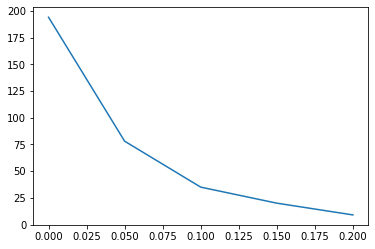

In [159]:
# Checking variance for all columns

from numpy import arange
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
# load the dataset
df = X_train_tf
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
thresholds = arange(0.0, 0.25, 0.05)

# apply transform with each threshold
results = list()
for t in thresholds:
# define the transform
    transform = VarianceThreshold(threshold=t)
# transform the input data
    X_sel = transform.fit_transform(X)
# determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
# store the result
    results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()

(24293, 94) (24293,)
>Threshold=0.00, Features=94
>Threshold=0.05, Features=59
>Threshold=0.10, Features=24
>Threshold=0.15, Features=11
>Threshold=0.20, Features=5


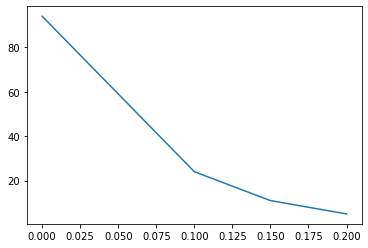

In [160]:
# Checking variance for only numerical values

from numpy import arange
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
# load the dataset
df = trans_train_df
# split data into inputs and outputs
data = df.values
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)
thresholds = arange(0.0, 0.25, 0.05)

# apply transform with each threshold
results = list()
for t in thresholds:
# define the transform
    transform = VarianceThreshold(threshold=t)
# transform the input data
    X_sel = transform.fit_transform(X)
# determine the number of input features
    n_features = X_sel.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
# store the result
    results.append(n_features)
# plot the threshold vs the number of selected features
pyplot.plot(thresholds, results)
pyplot.show()